# Warehouse Management - Shoe Demand Analysis

Objective: 

The goal of this analysis is to explore shoe demand trends in warehouse sales data. We focus on understanding how demand varies with shoe sizes and across different months, to inform better stocking and inventory strategies.

# Exploratory Data Analysis (EDA)


Cleaned and explored data containing shoe sales information including sizes, sale price, date, and gender.

Analyzed demand trends by month and shoe size (US).

Identified patterns in seasonal variation and most in-demand sizes.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [11]:
# Load CSV file (change filename as needed)
df = pd.read_csv('Al-Bundy_raw-data.csv')

# Preview data
df.head()


,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice
0,52389,1/1/2014,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014,1,159.0
1,52390,1/1/2014,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014,1,159.2
2,52391,1/1/2014,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014,1,119.2
3,52392,1/1/2014,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014,1,159.0
4,52393,1/1/2014,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014,1,159.0


In [12]:
print(df.columns)


Index(['InvoiceNo', 'Date', 'Country', 'ProductID', 'Shop', 'Gender',
       'Size (US)', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount',
       'Year', 'Month', 'SalePrice'],
      dtype='object')


# Basic Data Checks

In [13]:
# Check for nulls, datatypes
print(df.info())
print(df.isnull().sum())

# Describe the numeric columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InvoiceNo      14967 non-null  int64  
 1   Date           14967 non-null  object 
 2   Country        14967 non-null  object 
 3   ProductID      14967 non-null  int64  
 4   Shop           14967 non-null  object 
 5   Gender         14967 non-null  object 
 6   Size (US)      14967 non-null  float64
 7   Size (Europe)  14967 non-null  object 
 8   Size (UK)      14967 non-null  float64
 9   UnitPrice      14967 non-null  int64  
 10  Discount       14967 non-null  float64
 11  Year           14967 non-null  int64  
 12  Month          14967 non-null  int64  
 13  SalePrice      14967 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.6+ MB
None
InvoiceNo        0
Date             0
Country          0
ProductID        0
Shop             0
Gender           0
Size (

,InvoiceNo,ProductID,Size (US),Size (UK),UnitPrice,Discount,Year,Month,SalePrice
count,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000
mean,59050.261509,2195.325115,9.195630,8.089497,164.171377,0.124013,2015.308211,6.689517,143.987913
std,3889.598714,27.633526,1.511719,1.970014,22.940544,0.170112,0.762320,3.319909,35.180799
min,52389.000000,2147.000000,4.500000,2.500000,129.000000,0.000000,2014.000000,1.000000,64.500000
25%,55648.500000,2172.000000,8.000000,6.500000,149.000000,0.000000,2015.000000,4.000000,125.100000
50%,59092.000000,2195.000000,9.000000,8.500000,159.000000,0.000000,2015.000000,7.000000,149.000000
75%,62433.000000,2219.000000,10.000000,9.500000,179.000000,0.200000,2016.000000,10.000000,169.000000
max,65777.000000,2242.000000,15.000000,14.500000,199.000000,0.500000,2016.000000,12.000000,199.000000


# Monthly Shoe Demand

In [16]:
# Group by Month and Shoe Size (US) to get demand counts
demand_by_month_size = df.groupby(['Month', 'Size (US)']).size().reset_index(name='Demand')

In [17]:
# Pivot for better plotting
pivot_df = demand_by_month_size.pivot(index='Month', columns='Size (US)', values='Demand').fillna(0)

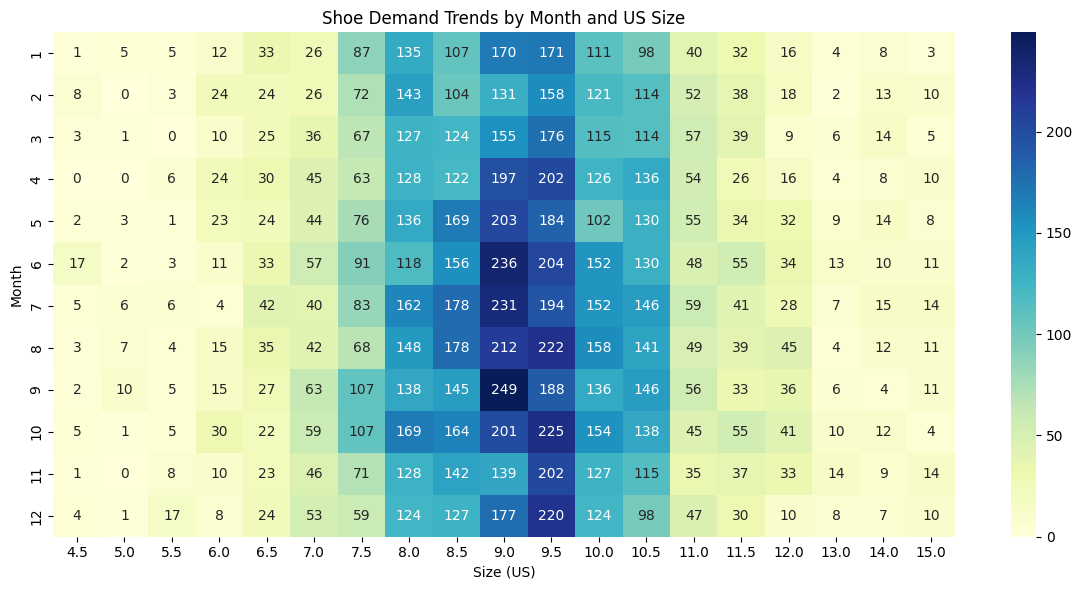

In [18]:
# Plot heatmap of demand trends
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt='g')
plt.title("Shoe Demand Trends by Month and US Size")
plt.ylabel("Month")
plt.xlabel("Size (US)")
plt.tight_layout()
plt.show()

#  Shoe Demand by Gender and Size (US)

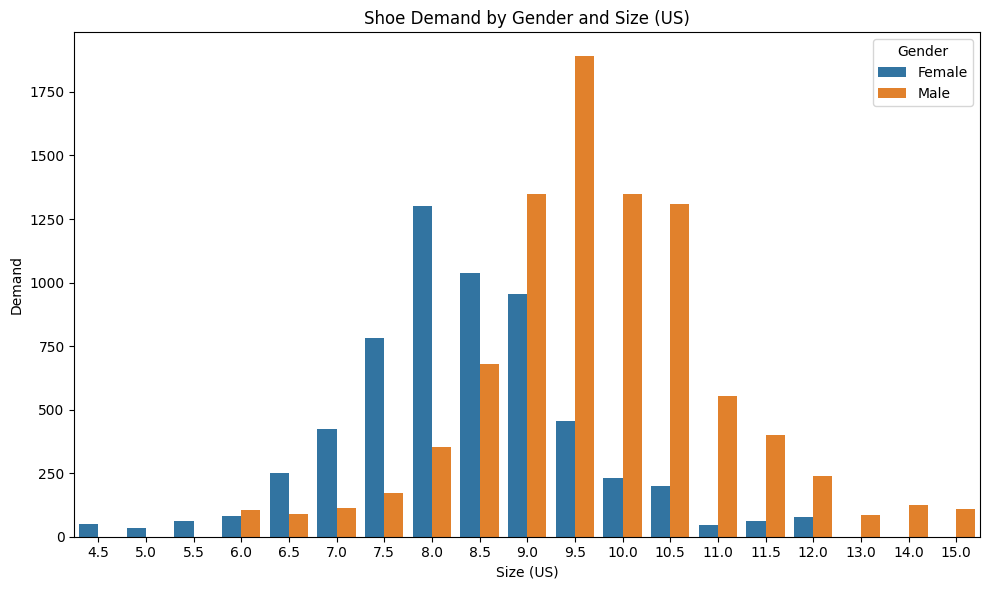

In [20]:
# Group by Gender and Size (US)
gender_size_demand = df.groupby(['Gender', 'Size (US)']).size().reset_index(name='Demand')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_size_demand, x='Size (US)', y='Demand', hue='Gender')
plt.title("Shoe Demand by Gender and Size (US)")
plt.xlabel("Size (US)")
plt.ylabel("Demand")
plt.tight_layout()
plt.show()


# Shoe Demand by Shop and Month

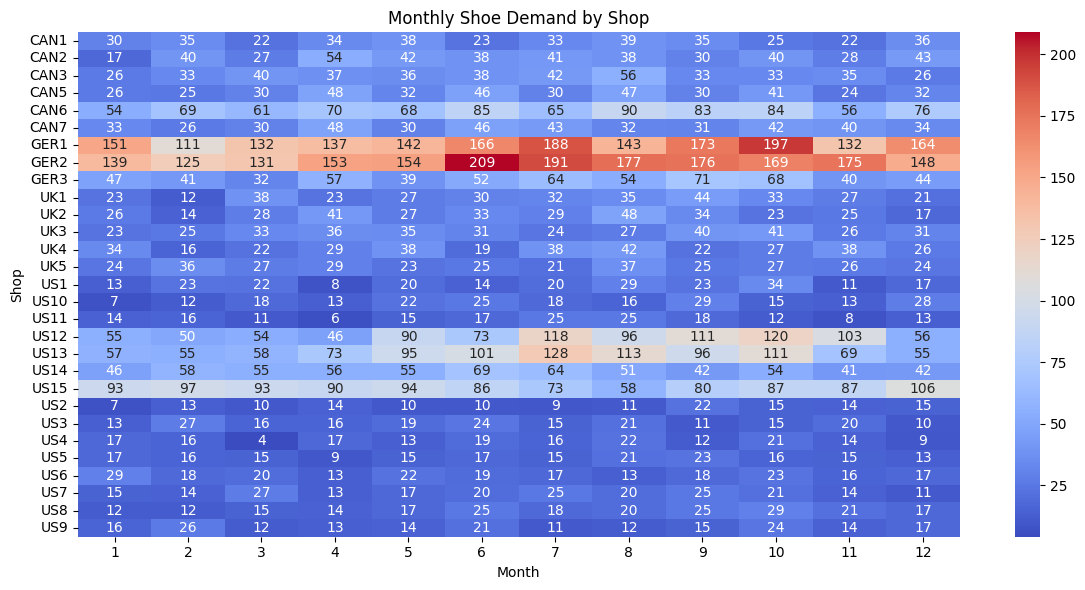

In [21]:
# Group by Shop and Month
shop_month_demand = df.groupby(['Shop', 'Month']).size().reset_index(name='Demand')

# Pivot for heatmap
pivot_shop_month = shop_month_demand.pivot(index='Shop', columns='Month', values='Demand').fillna(0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_shop_month, cmap='coolwarm', annot=True, fmt='g')
plt.title("Monthly Shoe Demand by Shop")
plt.xlabel("Month")
plt.ylabel("Shop")
plt.tight_layout()
plt.show()


# Average Sale Price vs. Discount by Month

This helps you understand how discounts might affect pricing trends month-wise.

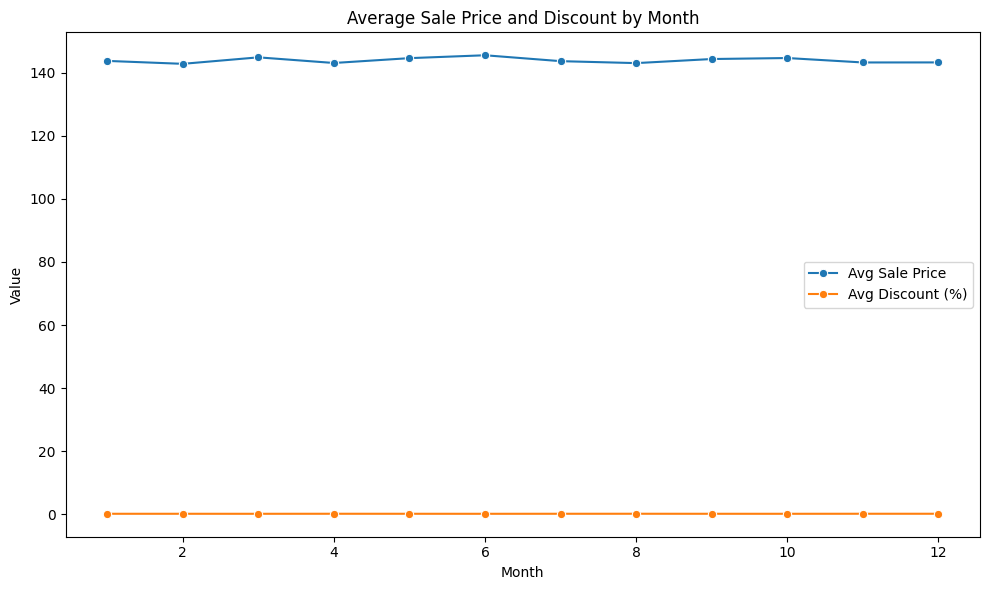

In [23]:
# Group by Month to calculate average Sale Price and Discount
price_discount_month = df.groupby('Month')[['SalePrice', 'Discount']].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=price_discount_month, x='Month', y='SalePrice', label='Avg Sale Price', marker='o')
sns.lineplot(data=price_discount_month, x='Month', y='Discount', label='Avg Discount (%)', marker='o')
plt.title('Average Sale Price and Discount by Month')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()


#  Top 10 Bestselling Shoe Sizes (US)

Quickly visualize which shoe sizes are most in demand overall.

C:\Users\neeno\AppData\Local\Temp\ipykernel_14688\2253626719.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_sizes, x='Size (US)', y='Demand', palette='viridis')


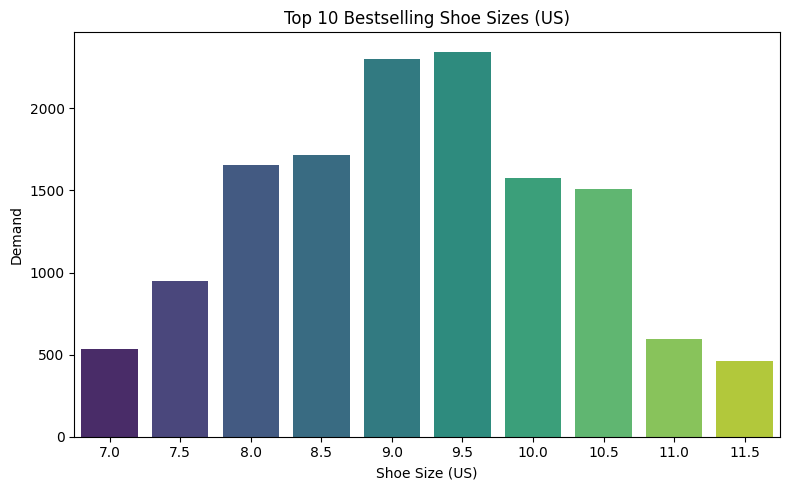

In [24]:
# Count shoe demand by US size
top_sizes = df['Size (US)'].value_counts().nlargest(10).reset_index()
top_sizes.columns = ['Size (US)', 'Demand']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=top_sizes, x='Size (US)', y='Demand', palette='viridis')
plt.title('Top 10 Bestselling Shoe Sizes (US)')
plt.xlabel('Shoe Size (US)')
plt.ylabel('Demand')
plt.tight_layout()
plt.show()


# Key Findings


🔸 Monthly Demand Trend
A line plot of total sales per month revealed peak demand periods.

This can help with seasonal inventory planning.

🔸 Shoe Size Popularity
The top 10 best-selling US sizes were visualized using a bar chart.

Useful for targeted stocking decisions and marketing efforts.

